### W207 Final Project - Forest Coverage Classification

#### Team members: Emily, Mohan, Stefania

The project and data is from https://www.kaggle.com/c/forest-cover-type-prediction/overview

We chose to use the K-Nearest Neighbors Classifier for the baseline.

In [3]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [4]:
# Read the data

df = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [5]:
# Rename columns
df.columns = ["Id", "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points",
    "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4",
    "Soil_Type1",  "Soil_Type2",  "Soil_Type3",  "Soil_Type4",  "Soil_Type5",  "Soil_Type6",
    "Soil_Type7",  "Soil_Type8",  "Soil_Type9",  "Soil_Type10", "Soil_Type11", "Soil_Type12",
    "Soil_Type13", "Soil_Type14", "Soil_Type15", "Soil_Type16", "Soil_Type17",
    "Soil_Type18", "Soil_Type19", "Soil_Type20", "Soil_Type21", "Soil_Type22",
    "Soil_Type23", "Soil_Type24", "Soil_Type25", "Soil_Type26", "Soil_Type27",
    "Soil_Type28", "Soil_Type29", "Soil_Type30", "Soil_Type31", "Soil_Type32",
    "Soil_Type33", "Soil_Type34", "Soil_Type35", "Soil_Type36", "Soil_Type37",
    "Soil_Type38", "Soil_Type39", "Soil_Type40", "Cover_Type"]



In [6]:
# Seperating features (X) and labels (y)
from sklearn.model_selection import train_test_split

X, y = df.drop(["Cover_Type"], axis = 1), df["Cover_Type"]

train_data, dev_data, train_data_label, dev_data_label = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
print('train_data shape: ',train_data.shape)
print('train_data_labels shape: ',train_data_label.shape)
print('dev_data shape: ',dev_data.shape)
print('dev_data_labels shape: ',dev_data_label.shape)

train_data shape:  (12096, 55)
train_data_labels shape:  (12096,)
dev_data shape:  (3024, 55)
dev_data_labels shape:  (3024,)


In [7]:
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
14128,14129,2942,151,27,376,191,1928,242,227,96,...,0,0,0,0,0,0,0,0,0,0
4425,4426,2869,299,9,90,-11,1670,196,237,181,...,0,0,0,0,0,0,0,0,0,0
909,910,2928,294,6,216,21,5075,204,239,174,...,0,0,0,0,0,0,0,0,0,0
5123,5124,2827,144,18,120,24,2255,242,234,114,...,0,0,0,0,0,0,0,0,0,0
10901,10902,2559,336,14,30,12,2006,187,220,171,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#create a KNN model with varying nearest neighbors as the baseline
#We chose to loop through values from 1 to 20 to assess the F1 scores the KNN algorithm
f1 = []
for i in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(train_data, train_data_label)
    y_dev_pred = knn_model.predict(dev_data)
    knn_f1 = round(metrics.f1_score(dev_data_label, y_dev_pred, average='macro'),4)
    f1.append(knn_f1)
    if (i == 1 or i % 2 == 0):
        print("k = ", i, "F1 of baseline model = " + str(knn_f1))
        print("")

k =  1 F1 of baseline model = 0.8445

k =  2 F1 of baseline model = 0.8253

k =  4 F1 of baseline model = 0.8089

k =  6 F1 of baseline model = 0.7967

k =  8 F1 of baseline model = 0.78

k =  10 F1 of baseline model = 0.7702

k =  12 F1 of baseline model = 0.7636

k =  14 F1 of baseline model = 0.7569

k =  16 F1 of baseline model = 0.7487

k =  18 F1 of baseline model = 0.7365

k =  20 F1 of baseline model = 0.7292



Text(0, 0.5, 'F1 Score')

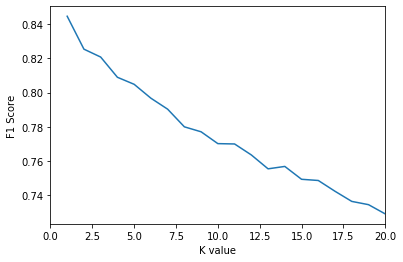

In [9]:
plt.plot(range(1,21), f1)
plt.xlim(0,20)
plt.xlabel("K value")
plt.ylabel("F1 Score")

We can see that the F1 scores decline as K increases. We will use the baseline value of k = 1. The f1 score is .8445.

## EDA

There are twelve distinct features available to us:

1. **Elevation** - Elevation in meters 
2. **Aspect** - Aspect in degrees azimuth 
3. **Slope** - Slope in degrees 
4. **Horizontal_Distance_To_Hydrology** - Horzontal distance to nearest surface water features 
5. **Vertical_Distance_To_Hydrology** - Vertical distance to nearest surface water features 
6. **Horizontal_Distance_To_Roadways** - Horzontal distance to nearest roadway 
7. **Hillshade_9am (0 to 255 index)** - Hillshade distance at 9am, summer solstice 
8. **Hillshade_Noon (0 to 255 index)** - Hillshade index at noon, summer solstice 
9. **Hillshade_3pm (0 to 255 index)** - Hillshade index at 3pm, summer solstice 
10. **Horizontal_Distance_To_Fire_Points** - Horzontal distance to nearest wildfire ignition points 
11. **Wilderness_Area** (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation 
12. **Soil_Type** (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation 

Target is **Cover_Type** that designates forest cover type. The 7 cover types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


### correlation matrix - Stefania
### univariate analysis - Emily
### distribution of soil types and forest cover type - Mohan

## Data Cleaning

Let us remove ID since this has no significance in predicting cover type. Similarly, we remove soil types 7 and 15 as these have no values represented in data.

In [11]:
# Cleaning data by removing Id, Soil_Type7 and Soil_Type15

train_data = train_data.drop(["Id", "Soil_Type7", "Soil_Type15"], axis = 1)
dev_data = dev_data.drop(["Id", "Soil_Type7", "Soil_Type15"], axis = 1)
test_data = test_data.drop(["Id", "Soil_Type7", "Soil_Type15"], axis = 1)


print('train_data shape: ',train_data.shape)
print('dev_data shape: ',dev_data.shape)
print('test_data shape: ',test_data.shape)


train_data shape:  (12096, 52)
dev_data shape:  (3024, 52)
test_data shape:  (565892, 52)


### transformation - all

### Decision trees

#### Start with one tree

In [12]:
# create a baseline random forest using all the features 

from sklearn.ensemble import RandomForestClassifier

RF_baseline = RandomForestClassifier(min_samples_split = 2, n_estimators = 200, max_depth = 20)
RF_baseline.fit(train_data, train_data_label) # Fitting the train data to the classifier 
predict = RF_baseline.predict(test_data)
RF_pred = RF_baseline.predict(dev_data)
RF_f1 = metrics.f1_score(dev_data_label, RF_pred, average='macro')
print("F1 score of baseline Random Forest = " + str(RF_f1))

KeyboardInterrupt: 

In [ ]:
# Important features of the random forest

importances = RF_baseline.feature_importances_
indices = np.argsort(importances)[::-1] 
print("Random Forest top impportant features")
importances_df = pd.DataFrame(columns=['Rank','Feature', 'Importance'])

for i in range(len(indices)):
    importance = np.around(importances[indices[i]],decimals=4)
    feature = train_data.columns[indices[i]]
    rank = i + 1
    importances_df.loc[i] = [rank, feature, importance]


# List the feature importances of the forest

importances_df

In [ ]:
# Plot the feature importances of the forest
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

indices=indices[:20] 
plt.figure(figsize = (12,5)) 
plt.title("Top features") 
plt.bar(range(20), importances[indices], color="gr", align="center") 
plt.xticks(range(20), train_data.columns[indices], fontsize=14, rotation=90) 
plt.xlim([-1, 20]) 
plt.show()


The Random Forest baseline model performs well on the training data, with a 0.85 F1 score.

Elevation is exteremly significant, followed by Horizontal distance to Roadways, Fire points and Hydrology. 

#### Feature engineering - Mohan

### SVM - Mohan

### Gradient Descent

### Ensemble

In [13]:
ex = df[["Elevation", "Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points", "Cover_Type"]]

count    15120.000000
mean         4.000000
std          2.000066
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: Cover_Type, dtype: float64

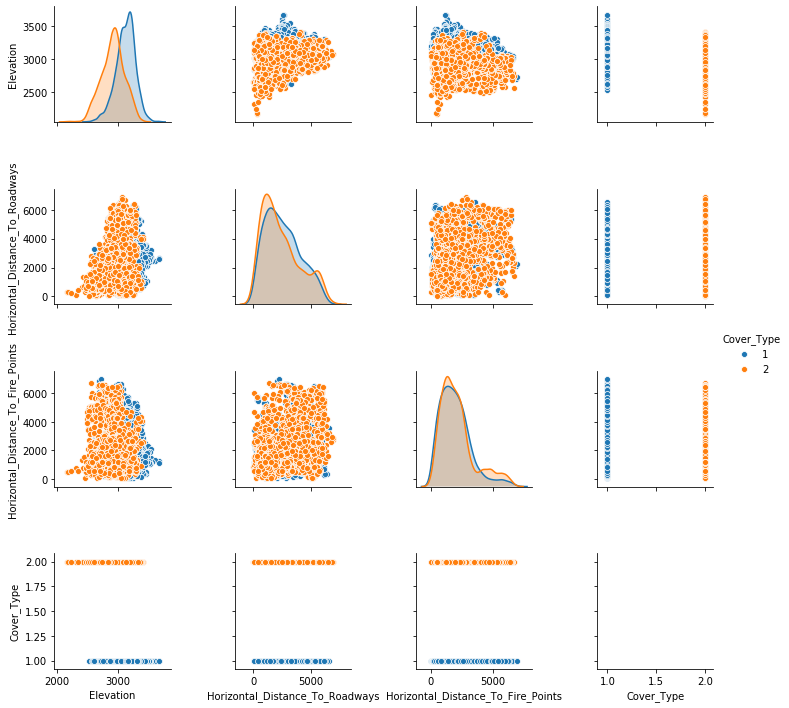

In [22]:
sns.pairplot(ex[(ex["Cover_Type"] == 1) | (ex["Cover_Type"] == 2)], hue = "Cover_Type")

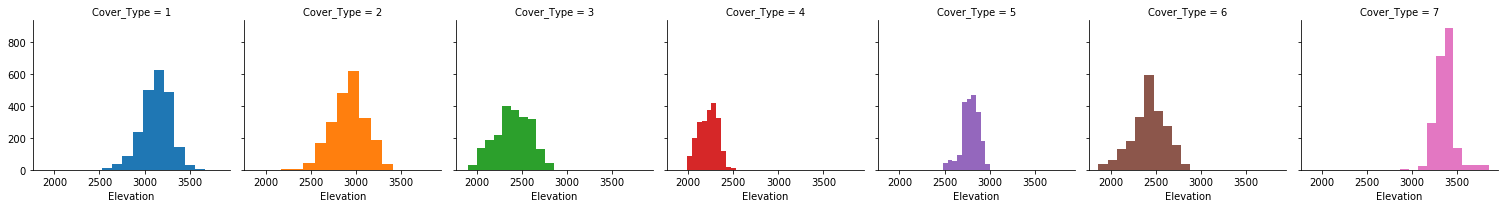

In [15]:
g = sns.FacetGrid(df, col="Cover_Type", hue = "Cover_Type")
g.map(plt.hist, "Elevation");

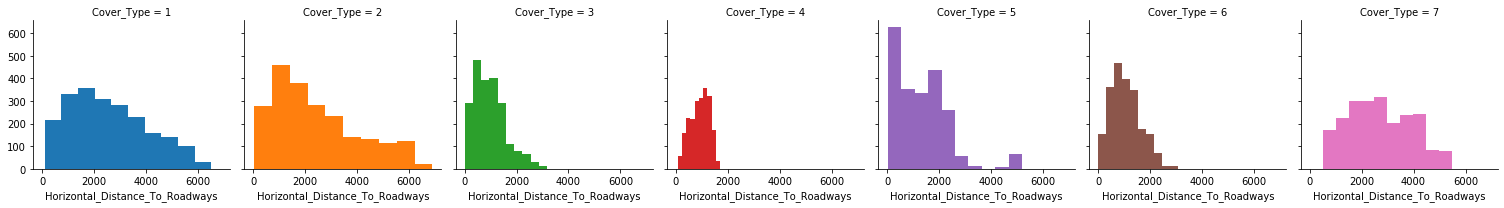

In [16]:
g = sns.FacetGrid(df, col="Cover_Type", hue = "Cover_Type")
g.map(plt.hist, "Horizontal_Distance_To_Roadways");

In [17]:
list(dev_data_label)[0]

4